# Assignment 2 - Learning Bayesian networks with pyAgrum

In [68]:
%pip install pyagrum
%pip install pandas
%pip install matplotlib
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [69]:
import pyagrum as gum
import pyagrum.lib.notebook as gnb
import pyagrum.lib.bn_vs_bn as gbnbn
import pyagrum.lib.bn2roc as gbnroc
import pandas as pd
import matplotlib.pyplot as plt

## Investigating the effect of sample size of learning structure
For the first part of the assignment, we are required to investigate the effect of sample size on learning structure.

### Loading true BN

In [70]:
real_bn = gum.loadBN("data/sport_injury.net")

real_bn

(pyagrum.BayesNet@000001B2112878B0) BN{nodes: 10, arcs: 11, domainSize: 2048, dim: 42, mem: 656o}

### Using MIIC as constraint-based algorithm to learn the structure

In [71]:
structural_hamming_distances_micc = {}
for sample_size in [50, 100, 500, 1000, 2_000, 5_000, 10_000]:
    learner = gum.BNLearner(f"data/sport_injury_{sample_size}.csv")
    learned_bn = learner.learnBN()

    # Display the learned BN and compare it with the real BN
    gnb.sideBySide(
        real_bn, learned_bn, gnb.getBNDiff(real_bn, learned_bn), gbnbn.graphDiffLegend()
        )
    
    # Calculate and print the Structural Hamming Distance
    comparison = gbnbn.GraphicalBNComparator(real_bn, learned_bn)
    print(f"The difference between the real BN and the learned BN is terms of Structural Hamming Distance: {comparison.hamming()['structural hamming']}")
    structural_hamming_distances_micc[sample_size] = comparison.hamming()['structural hamming']

G <!-- a --> <!-- b --> <!-- a->b --> a->b overflow <!-- c --> <!-- d --> <!-- c->d --> c->d Missing <!-- e --> <!-- f --> <!-- e->f --> e->f reversed <!-- g --> <!-- h --> <!-- g->h --> g->h Correct


The difference between the real BN and the learned BN is terms of Structural Hamming Distance: 11


G <!-- a --> <!-- b --> <!-- a->b --> a->b overflow <!-- c --> <!-- d --> <!-- c->d --> c->d Missing <!-- e --> <!-- f --> <!-- e->f --> e->f reversed <!-- g --> <!-- h --> <!-- g->h --> g->h Correct


The difference between the real BN and the learned BN is terms of Structural Hamming Distance: 10


G <!-- a --> <!-- b --> <!-- a->b --> a->b overflow <!-- c --> <!-- d --> <!-- c->d --> c->d Missing <!-- e --> <!-- f --> <!-- e->f --> e->f reversed <!-- g --> <!-- h --> <!-- g->h --> g->h Correct


The difference between the real BN and the learned BN is terms of Structural Hamming Distance: 5


G <!-- a --> <!-- b --> <!-- a->b --> a->b overflow <!-- c --> <!-- d --> <!-- c->d --> c->d Missing <!-- e --> <!-- f --> <!-- e->f --> e->f reversed <!-- g --> <!-- h --> <!-- g->h --> g->h Correct


The difference between the real BN and the learned BN is terms of Structural Hamming Distance: 4


G <!-- a --> <!-- b --> <!-- a->b --> a->b overflow <!-- c --> <!-- d --> <!-- c->d --> c->d Missing <!-- e --> <!-- f --> <!-- e->f --> e->f reversed <!-- g --> <!-- h --> <!-- g->h --> g->h Correct


The difference between the real BN and the learned BN is terms of Structural Hamming Distance: 4


G <!-- a --> <!-- b --> <!-- a->b --> a->b overflow <!-- c --> <!-- d --> <!-- c->d --> c->d Missing <!-- e --> <!-- f --> <!-- e->f --> e->f reversed <!-- g --> <!-- h --> <!-- g->h --> g->h Correct


The difference between the real BN and the learned BN is terms of Structural Hamming Distance: 4


G <!-- a --> <!-- b --> <!-- a->b --> a->b overflow <!-- c --> <!-- d --> <!-- c->d --> c->d Missing <!-- e --> <!-- f --> <!-- e->f --> e->f reversed <!-- g --> <!-- h --> <!-- g->h --> g->h Correct


The difference between the real BN and the learned BN is terms of Structural Hamming Distance: 0


(0.0, 11.55)

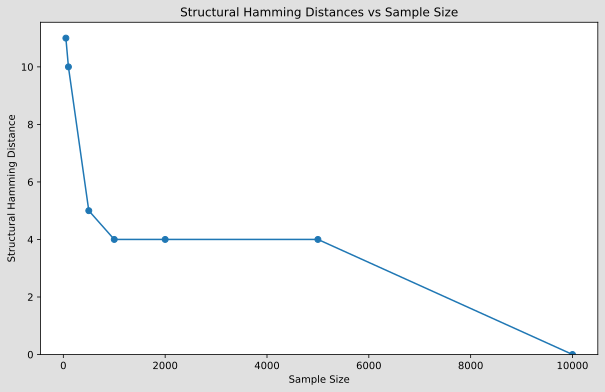

In [72]:
# Plot the Structural Hamming Distances as line chart
plt.figure(figsize=(10, 6))
plt.plot(
    list(structural_hamming_distances_micc.keys()),
    list(structural_hamming_distances_micc.values()),
    marker='o'
)
plt.title('Structural Hamming Distances vs Sample Size')
plt.xlabel('Sample Size')
plt.ylabel('Structural Hamming Distance')
plt.ylim(bottom=0)

### Using greedy hill climbing as score-based algorithm to learn the structure

In [73]:
structural_hamming_distances_hill_climbing = {}
for sample_size in [50, 100, 500, 1000, 2_000, 5_000, 10_000]:
    learner = gum.BNLearner(f"data/sport_injury_{sample_size}.csv")
    learner.useGreedyHillClimbing()
    learned_bn = learner.learnBN()
    gnb.sideBySide(
        real_bn, learned_bn, gnb.getBNDiff(real_bn, learned_bn), gbnbn.graphDiffLegend()
        )
    
    # Calculate and print the Structural Hamming Distance
    comparison = gbnbn.GraphicalBNComparator(real_bn, learned_bn)
    print(f"The difference between the real BN and the learned BN is terms of Structural Hamming Distance: {comparison.hamming()['structural hamming']}")
    structural_hamming_distances_hill_climbing[sample_size] = comparison.hamming()['structural hamming']

G <!-- a --> <!-- b --> <!-- a->b --> a->b overflow <!-- c --> <!-- d --> <!-- c->d --> c->d Missing <!-- e --> <!-- f --> <!-- e->f --> e->f reversed <!-- g --> <!-- h --> <!-- g->h --> g->h Correct


The difference between the real BN and the learned BN is terms of Structural Hamming Distance: 11


G <!-- a --> <!-- b --> <!-- a->b --> a->b overflow <!-- c --> <!-- d --> <!-- c->d --> c->d Missing <!-- e --> <!-- f --> <!-- e->f --> e->f reversed <!-- g --> <!-- h --> <!-- g->h --> g->h Correct


The difference between the real BN and the learned BN is terms of Structural Hamming Distance: 13


G <!-- a --> <!-- b --> <!-- a->b --> a->b overflow <!-- c --> <!-- d --> <!-- c->d --> c->d Missing <!-- e --> <!-- f --> <!-- e->f --> e->f reversed <!-- g --> <!-- h --> <!-- g->h --> g->h Correct


The difference between the real BN and the learned BN is terms of Structural Hamming Distance: 9


G <!-- a --> <!-- b --> <!-- a->b --> a->b overflow <!-- c --> <!-- d --> <!-- c->d --> c->d Missing <!-- e --> <!-- f --> <!-- e->f --> e->f reversed <!-- g --> <!-- h --> <!-- g->h --> g->h Correct


The difference between the real BN and the learned BN is terms of Structural Hamming Distance: 11


G <!-- a --> <!-- b --> <!-- a->b --> a->b overflow <!-- c --> <!-- d --> <!-- c->d --> c->d Missing <!-- e --> <!-- f --> <!-- e->f --> e->f reversed <!-- g --> <!-- h --> <!-- g->h --> g->h Correct


The difference between the real BN and the learned BN is terms of Structural Hamming Distance: 12


G <!-- a --> <!-- b --> <!-- a->b --> a->b overflow <!-- c --> <!-- d --> <!-- c->d --> c->d Missing <!-- e --> <!-- f --> <!-- e->f --> e->f reversed <!-- g --> <!-- h --> <!-- g->h --> g->h Correct


The difference between the real BN and the learned BN is terms of Structural Hamming Distance: 11


G <!-- a --> <!-- b --> <!-- a->b --> a->b overflow <!-- c --> <!-- d --> <!-- c->d --> c->d Missing <!-- e --> <!-- f --> <!-- e->f --> e->f reversed <!-- g --> <!-- h --> <!-- g->h --> g->h Correct


The difference between the real BN and the learned BN is terms of Structural Hamming Distance: 10


(0.0, 13.2)

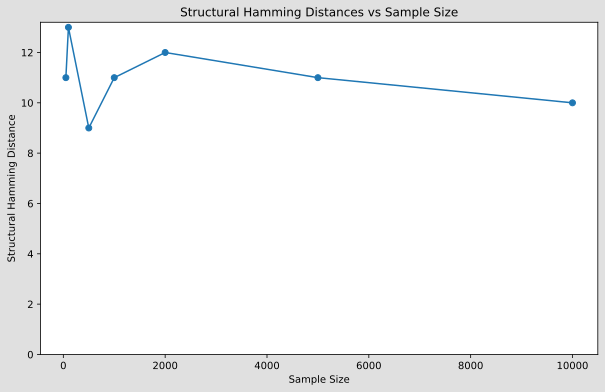

In [74]:
# Plot the Structural Hamming Distances as line chart
plt.figure(figsize=(10, 6))
plt.plot(
    list(structural_hamming_distances_hill_climbing.keys()),
    list(structural_hamming_distances_hill_climbing.values()),
    marker='o'
)
plt.title('Structural Hamming Distances vs Sample Size')
plt.xlabel('Sample Size')
plt.ylabel('Structural Hamming Distance')
plt.ylim(bottom=0)

## Breast cancer network
For the second part of this assignment, we are asked to compare the performance of a learned BN for classifying breast cancer, with the performance of one based on expert knowledge.

### Loading the BN based on expert knowledge

In [75]:
expert_cancer_bn = gum.loadBN("data/bc.net")
expert_cancer_bn

(pyagrum.BayesNet@000001B21128E5F0) BN{nodes: 16, arcs: 18, domainSize: 10^6.42393, dim: 106, mem: 1Ko 360o}

### Create split for train and test
We are given a csv, but we still need to split it in train and test. We will save these as `bc_train.csv` and `bc_test.csv`.

In [76]:
cancer_data = pd.read_csv("data/bc.csv")

train_data = cancer_data.sample(frac=0.8, random_state=42)
test_data = cancer_data.drop(train_data.index)

train_data.to_csv("data/bc_train.csv", index=False)
test_data.to_csv("data/bc_test.csv", index=False)

### Learn BN using CSV and comparison with expert knowledge BN
We are required to use the greedy hill climbing algorithm.

In [77]:
learner = gum.BNLearner(f"data/bc_train.csv")
learner.useGreedyHillClimbing()
learned_cancer_bn = learner.learnBN()
gnb.sideBySide(
    expert_cancer_bn, learned_cancer_bn, gnb.getBNDiff(expert_cancer_bn, learned_cancer_bn), gbnbn.graphDiffLegend()
    )

# Calculate and print the Structural Hamming Distance
comparison = gbnbn.GraphicalBNComparator(expert_cancer_bn, learned_cancer_bn)
print(f"The difference between the real BN and the learned BN is terms of Structural Hamming Distance: {comparison.hamming()['structural hamming']}")

G <!-- a --> <!-- b --> <!-- a->b --> a->b overflow <!-- c --> <!-- d --> <!-- c->d --> c->d Missing <!-- e --> <!-- f --> <!-- e->f --> e->f reversed <!-- g --> <!-- h --> <!-- g->h --> g->h Correct


The difference between the real BN and the learned BN is terms of Structural Hamming Distance: 19


### Comparing classifiers

In [78]:
print(expert_cancer_bn["BC"])
print(learned_cancer_bn["BC"])

BC:Labelized({No|Invasive|Insitu})
BC:Labelized({Insitu|Invasive|No})


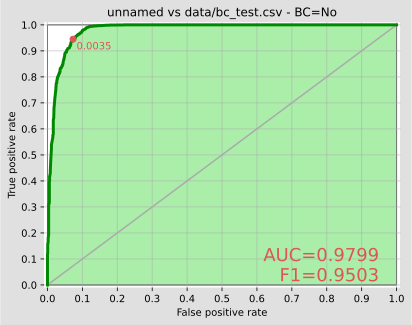

(0.9799416097458531,
 np.float64(0.0034808037),
 0.9839164869516798,
 np.float64(0.00055085715))

In [79]:
gbnroc.showROC(learned_cancer_bn, "data/bc_test.csv", "BC", "No", show_progress=False)

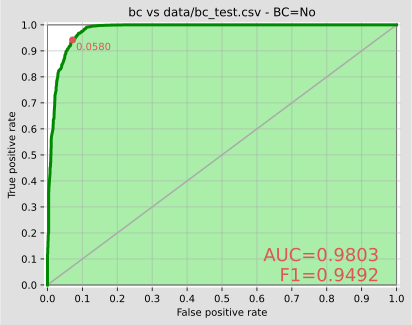

(0.9803364662435676,
 np.float64(0.05797526465),
 0.9844167758490809,
 np.float64(0.0084393477))

In [80]:
gbnroc.showROC(expert_cancer_bn, "data/bc_test.csv", "BC", "No", show_progress=False)

### Experiment to see if adding structural constrains improves performance
For the last part of this assignment, we are required to add some manual constrains to steer the learning algorithm closer to the expert and investigate its classifying performance. Based on the the earlier comparison of the two BNs, we can see four overflowing arrows. These we will block.

In [81]:
learner = gum.BNLearner(f"data/bc_train.csv")
learner.useGreedyHillClimbing()
learner.addForbiddenArc("BC", "BreastDensity")
learner.addForbiddenArc("BC", "Shape")
learner.addForbiddenArc("BC", "FibrTissueDev")
learner.addForbiddenArc("Mass", "Spiculation")
learned_cancer_bn_with_constrains = learner.learnBN()
gnb.sideBySide(
    expert_cancer_bn, learned_cancer_bn_with_constrains, gnb.getBNDiff(expert_cancer_bn, learned_cancer_bn_with_constrains), gbnbn.graphDiffLegend()
    )

# Calculate and print the Structural Hamming Distance
comparison = gbnbn.GraphicalBNComparator(expert_cancer_bn, learned_cancer_bn_with_constrains)
print(f"The difference between the real BN and the learned BN is terms of Structural Hamming Distance: {comparison.hamming()['structural hamming']}")

G <!-- a --> <!-- b --> <!-- a->b --> a->b overflow <!-- c --> <!-- d --> <!-- c->d --> c->d Missing <!-- e --> <!-- f --> <!-- e->f --> e->f reversed <!-- g --> <!-- h --> <!-- g->h --> g->h Correct


The difference between the real BN and the learned BN is terms of Structural Hamming Distance: 11


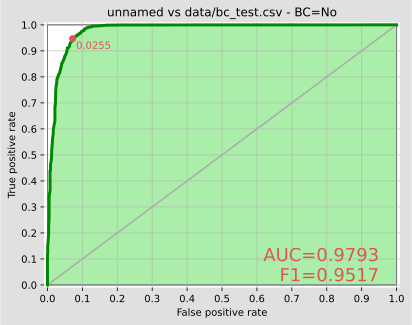

(0.97934685964484,
 np.float64(0.02547555105),
 0.9831611379994122,
 np.float64(0.00454585555))

In [82]:
gbnroc.showROC(learned_cancer_bn_with_constrains, "data/bc_test.csv", "BC", "No", show_progress=False)